In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact



def plot_line(slope):
    x = np.linspace(-10, 10, 400)
    intercept = 0
    y = slope * x  + intercept
    
    plt.figure(figsize=(6, 4))
    plt.plot(x, y, label=f'y = {slope:.2f}x + {intercept:.2f}')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.legend()
    plt.show()

#interact(plot_line, 
#         slope=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description='Pente'),
 #        intercept=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, description='Ordonnée à l''origine'))

interact(plot_line, 
         slope=widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description='Pente'))

interactive(children=(FloatSlider(value=1.0, description='Pente', max=5.0, min=-5.0), Output()), _dom_classes=…

<function __main__.plot_line(slope)>

In [57]:
import py_vollib.black_scholes as bs
from scipy.stats import norm
import math

def delta(S, K, t, r, sigma, flag='c'):
    d1 = 1/(sigma*math.sqrt(t))*(math.log(S/K)+(r+sigma**2/2)*t)
    return norm.cdf(d1)

def black_scholes_price(S, K, t, r, sigma, flag='c'):

    d1 = 1/(sigma*math.sqrt(t))*(math.log(S/K)+(r+sigma**2/2)*t)
    d2 = d1 - sigma*math.sqrt(t)

    return S*norm.cdf(d1) - K*math.exp(-r*t)*norm.cdf(d2)

flag = 'c'
S = 100
K = 90
t = 0.5
r = 0.01
sigma = 0.02

# print(black_scholes_price(S, K, t, r, sigma))
# call = bs.black_scholes(flag, S, K, t, r, sigma)
# print(call)
call = lambda vol : black_scholes_price(S, K, t, r, vol, flag='c')
#print(call(0.02))



def plot_call_price(vol):
    #Define the parameters

    S = 100
    t = 1
    r = 0.05
    sigma = vol

    # Calculate the call price
    strikes = np.linspace(50,200,50)
    call_price = [black_scholes_price(S, K, t, r, sigma) for K in strikes]
    delta_values = [delta(S, K, t, r, sigma)*100 for K in strikes]

    plt.figure(figsize=(6, 4))
    plt.plot(strikes, call_price, label='Black-Scholes call price')
    plt.plot(strikes, delta_values, label='Delta*100')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlim(50, 200)
    #plt.ylim(-10, 10)
    plt.legend()
    plt.show()

interact(plot_call_price, vol=widgets.FloatSlider(min=0.00001, max=0.5, step=0.001, value=1, description='Volatility'))

    


interactive(children=(FloatSlider(value=0.5, description='Volatility', max=0.5, min=1e-05, step=0.001), Output…

<function __main__.plot_call_price(vol)>

10.448876872658595
10.448876872658595


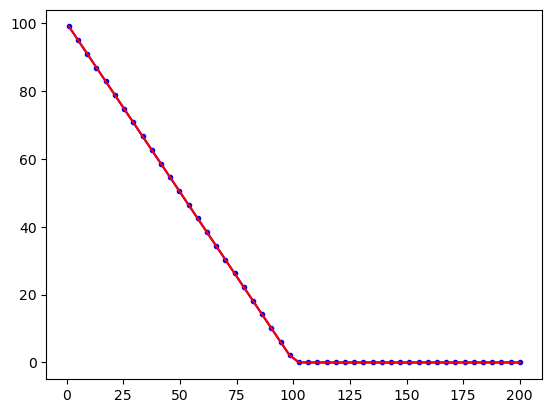

In [52]:
call = bs.black_scholes('c',100,90,.5,.01,.02)
print(call)

flag = 'c'
S = 100
K = 90
t = 0.5
r = 0.01
sigma = 0.02
call2 = bs.black_scholes(flag, S, K, t, r, sigma)
print(call2)


strikes = np.linspace(1,200,50)
call_price = [black_scholes_price(S, K, t, r, sigma) for K in strikes]
call_price_vollib = [bs.black_scholes(flag, S, K, t, r, sigma) for K in strikes]

plt.plot(strikes, call_price, label='fonction main',color='blue', marker='.')
plt.plot(strikes, call_price_vollib, label='fonction vollib',color='red')
plt.show()
